<a href="https://colab.research.google.com/github/FernandoGuillen-lab/DataScience/blob/main/Aprendizaje_no_supervisado_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import pandas as pd
import numpy as np
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, Normalizer, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn import cluster
from sklearn.metrics import calinski_harabasz_score
from yellowbrick.cluster import KElbowVisualizer
from sklearn import metrics
import plotly.graph_objects as go

In [ ]:
train=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Train (1).csv")
train.columns

Index(['Employee_ID', 'Gender', 'Age', 'Education_Level',
       'Relationship_Status', 'Hometown', 'Unit', 'Decision_skill_possess',
       'Time_of_service', 'Time_since_promotion', 'growth_rate', 'Travel_Rate',
       'Post_Level', 'Pay_Scale', 'Compensation_and_Benefits',
       'Work_Life_balance', 'VAR1', 'VAR2', 'VAR3', 'VAR4', 'VAR5', 'VAR6',
       'VAR7', 'Attrition_rate'],
      dtype='object')

In [ ]:
train = train.drop("Employee_ID", axis=1)
train

,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,...,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
0,F,42.0,4,Married,Franklin,IT,Conceptual,4.0,4,33,...,type2,3.0,4,0.7516,1.8688,2.0,4,5,3,0.1841
1,M,24.0,3,Single,Springfield,Logistics,Analytical,5.0,4,36,...,type2,4.0,3,-0.9612,-0.4537,2.0,3,5,3,0.0670
2,F,58.0,3,Married,Clinton,Quality,Conceptual,27.0,3,51,...,type2,1.0,4,-0.9612,-0.4537,3.0,3,8,3,0.0851
3,F,26.0,3,Single,Lebanon,Human Resource Management,Behavioral,4.0,3,56,...,type2,1.0,3,-1.8176,-0.4537,NaN,3,7,3,0.0668
4,F,31.0,1,Married,Springfield,Logistics,Conceptual,5.0,4,62,...,type3,3.0,1,0.7516,-0.4537,2.0,2,8,2,0.1827
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,F,23.0,5,Married,Franklin,Operarions,Behavioral,4.0,1,20,...,type3,3.0,1,0.7516,-0.4537,2.0,3,7,3,0.7839
6996,F,44.0,1,Married,Lebanon,R&D,Analytical,16.0,2,59,...,type3,3.0,2,-0.1048,-2.7762,2.0,4,8,4,0.1055
6997,F,49.0,3,Single,Springfield,IT,Directive,10.0,1,59,...,type2,4.0,2,-0.1048,-0.4537,2.0,4,8,3,0.7847
6998,F,47.0,3,Married,Washington,Sales,Behavioral,24.0,1,21,...,type0,2.0,4,0.7516,1.8688,2.0,3,6,3,0.4162


In [ ]:
t=train.copy()

cat= t[["Gender","Relationship_Status","Hometown","Unit","Decision_skill_possess","Compensation_and_Benefits"]]

x1= OrdinalEncoder().fit_transform(cat)

x1

array([[ 0.,  0.,  1.,  2.,  2.,  2.],
       [ 1.,  1.,  3.,  3.,  0.,  2.],
       [ 0.,  0.,  0.,  8.,  2.,  2.],
       ...,
       [ 0.,  1.,  3.,  2.,  3.,  2.],
       [ 0.,  0.,  4., 10.,  1.,  0.],
       [ 0.,  0.,  1.,  2.,  3.,  2.]])

In [ ]:
t=train.copy()

cat= t[["Gender","Relationship_Status","Hometown","Unit","Decision_skill_possess","Compensation_and_Benefits"]]

x2= OrdinalEncoder().fit_transform(cat)

df=pd.DataFrame(x2, columns=cat.columns)

tdf= pd.concat([t.drop(cat.columns, axis=1), df], axis=1)

tdf.drop(cat.columns, axis=1, inplace=True)

m= SimpleImputer(strategy= "mean")

tdfm= pd.DataFrame(m.fit_transform(tdf,), columns= tdf.columns)

x_norm= Normalizer().fit_transform(tdfm)

t= pd.DataFrame(x_norm, columns=tdfm.columns)

t



,Age,Education_Level,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
0,0.762366,0.072606,0.072606,0.072606,0.599002,0.018152,0.018152,0.127061,0.054455,0.072606,0.013643,0.033922,0.036303,0.072606,0.090758,0.054455,0.003342
1,0.531351,0.066419,0.110698,0.088559,0.797027,0.000000,0.066419,0.132838,0.088559,0.066419,-0.021281,-0.010045,0.044279,0.066419,0.110698,0.066419,0.001483
2,0.698788,0.036144,0.325298,0.036144,0.614452,0.000000,0.024096,0.096385,0.012048,0.048192,-0.011581,-0.005466,0.036144,0.036144,0.096385,0.036144,0.001025
3,0.410886,0.047410,0.063213,0.047410,0.884985,0.015803,0.047410,0.126426,0.015803,0.047410,-0.028724,-0.007170,0.029885,0.047410,0.110623,0.047410,0.001056
4,0.440713,0.014217,0.071083,0.056866,0.881425,0.014217,0.042650,0.028433,0.042650,0.014217,0.010685,-0.006450,0.028433,0.028433,0.113732,0.028433,0.002597
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,0.695253,0.151142,0.120914,0.030228,0.604568,0.030228,0.060457,0.181370,0.090685,0.030228,0.022720,-0.013715,0.060457,0.090685,0.211599,0.090685,0.023696
6996,0.576818,0.013109,0.209752,0.026219,0.773460,0.000000,0.026219,0.052438,0.039328,0.026219,-0.001374,-0.036395,0.026219,0.052438,0.104876,0.052438,0.001383
6997,0.626363,0.038349,0.127829,0.012783,0.754193,0.012783,0.025566,0.038349,0.051132,0.025566,-0.001340,-0.005800,0.025566,0.051132,0.102263,0.038349,0.010031
6998,0.805070,0.051387,0.411099,0.017129,0.359712,0.017129,0.085646,0.137033,0.034258,0.068517,0.012874,0.032011,0.034258,0.051387,0.102775,0.051387,0.007129


In [ ]:
k=KMeans(n_clusters=17)

k.fit(t)

labels=k.predict(t)

labels

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



array([13,  8, 15, ..., 16, 10, 12], dtype=int32)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

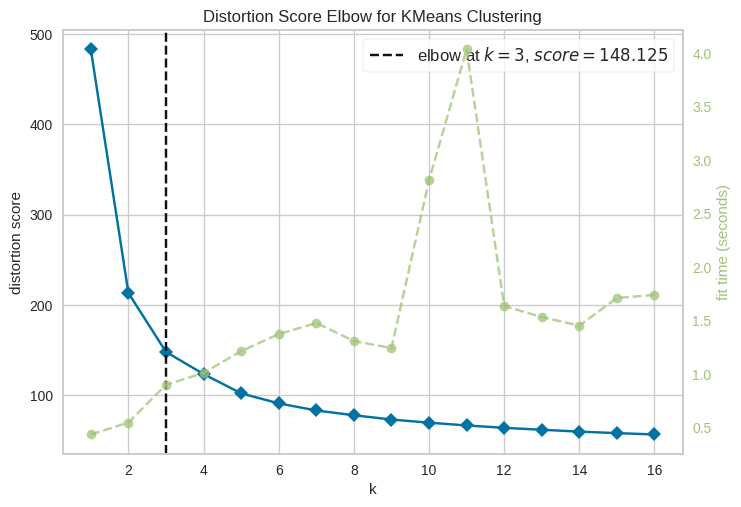

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
mod= KMeans(n_clusters=17)

vis= KElbowVisualizer(mod, k=(1,17))

vis.fit(t)

vis.show()

In [ ]:
k=3

k_means= cluster.KMeans(n_clusters=k)
y_pred1= k_means.fit_predict(t)
s1= metrics.silhouette_score(t,y_pred1)

single_linkage= cluster.AgglomerativeClustering(linkage="single",n_clusters=k)
y_pred2= single_linkage.fit_predict(t)
s2= metrics.silhouette_score(t,y_pred2)

spectral= cluster.SpectralClustering(n_clusters=k, affinity="nearest_neighbors")
y_pred3= spectral.fit_predict(t)
s3= metrics.silhouette_score(t,y_pred3)



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [ ]:
k=3

train["groups"]= y_pred1

tra= [train[train["groups"]==g]for g in range(k)]

grouped= pd.DataFrame()

grouped["Features"]= train.columns[:-1]

for g in range(k):
  row=[]
  for col in grouped["Features"]:
    if tra[g][col].dtype != "object":
      row.append (np.round(tra[g][col].mean(),2))
    else:
      row.append(tra[g][col].value_counts().keys()[0])
  grouped["Grupo"+str(g)]=row

grouped

,Features,Grupo0,Grupo1,Grupo2
0,Gender,F,F,F
1,Age,27.95,41.86,52.49
2,Education_Level,3.2,3.19,3.18
3,Relationship_Status,Married,Married,Married
4,Hometown,Lebanon,Lebanon,Lebanon
5,Unit,IT,IT,IT
6,Decision_skill_possess,Analytical,Directive,Conceptual
7,Time_of_service,5.41,14.35,22.96
8,Time_since_promotion,2.22,2.43,2.47
9,growth_rate,57.38,47.21,32.52


In [ ]:
df= grouped.transpose()
df.columns=df.loc["Features"]
df=df.drop("Features")
df=df.drop(["Gender", "Relationship_Status","Hometown","Unit","Decision_skill_possess","Compensation_and_Benefits"], axis=1)


df


Features,Age,Education_Level,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
Grupo0,27.95,3.2,5.41,2.22,57.38,0.81,2.79,5.95,2.39,3.08,0.0,-0.0,1.9,2.83,7.1,3.24,0.19
Grupo1,41.86,3.19,14.35,2.43,47.21,0.82,2.81,6.01,2.37,3.12,-0.02,-0.02,1.89,2.83,7.1,3.26,0.19
Grupo2,52.49,3.18,22.96,2.47,32.52,0.82,2.79,6.08,2.41,3.1,-0.0,-0.02,1.88,2.85,7.11,3.28,0.18


In [ ]:

xt= StandardScaler().fit_transform(df.to_numpy())
xt= xt + abs(np.min(xt))

col= df.columns

fig= go.Figure()

for j in range(len(df)):
  fig.add_trace(go.Bar( y= xt[j,:], x= col, name= "Group" +str(j)))
  fig.update_layout(title= "variable mean per group", yaxis_title= "normalized values", margin = dict(l=50, r=50, t=50, b=50))
fig.show()

In [ ]:
#En general se puede decir que en los tres grupos tienen en promedio una taza de deserción similar, a escepción del grupo 0 y 1, ya que, estos dos tienen el mismo ratio.
#Los grupos se diferencian principalmente por la edad, siendoi el grupo 2 con empleados mayores.
#A pesar de las diferencias en el ratio de deserción no son tan diferentes entre los grupos, se observa que existe una tendencia decreciente con la edad.

